In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    f1_score, precision_score, recall_score,
    roc_auc_score, confusion_matrix, roc_curve
)

sns.set(style="whitegrid")

In [2]:
# Load Preprocessed Data and Train/Test Split
df = pd.read_csv("../data/preprocessed_data.csv")

X = df.drop("Revenue", axis=1)
y = df["Revenue"].astype(int)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

In [3]:
# Load or Define All Final Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import load_model
import joblib

# Assume these are already trained and fitted
logreg_model = joblib.load("../models/logreg.pkl")
svm_model = joblib.load("../models/svm.pkl")
rf_model = joblib.load("../models/rf.pkl")
xgb_model = joblib.load("../models/xgb.pkl")
dnn_model = load_model("../models/dnn_model.h5")

In [4]:
# Model Evaluation Function
def evaluate_model(name, model, X_test, y_test, is_keras=False):
    if is_keras:
        y_proba = model.predict(X_test).flatten()
        y_pred = (y_proba >= 0.5).astype(int)
    else:
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

    metrics = {
        "Model": name,
        "F1": f1_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_proba)
    }
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {metrics['AUC']:.2f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{name} - ROC Curve")
    plt.legend()
    plt.show()

    return metrics

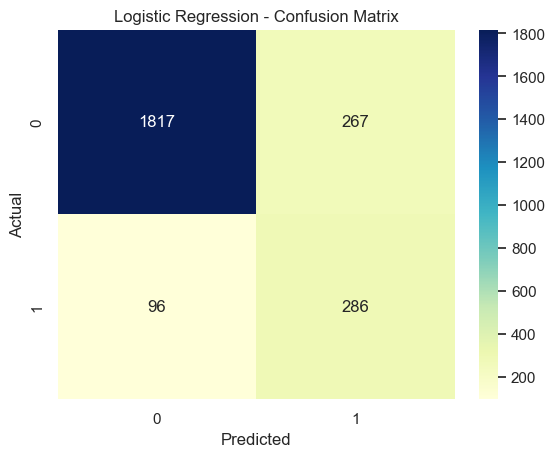

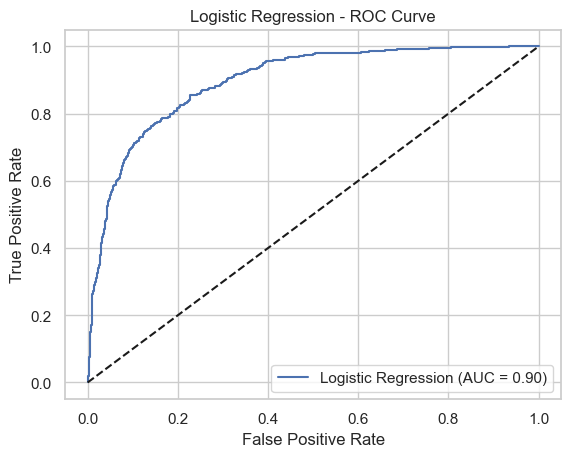

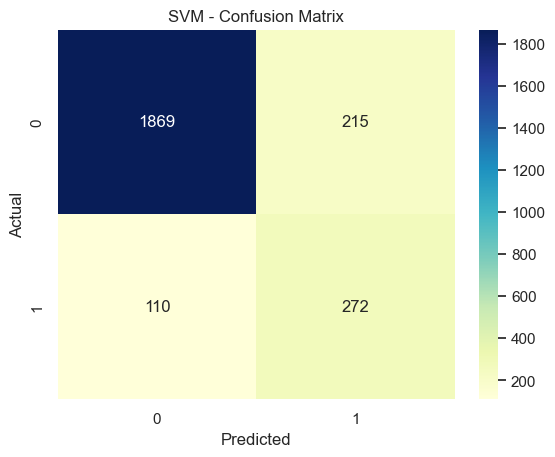

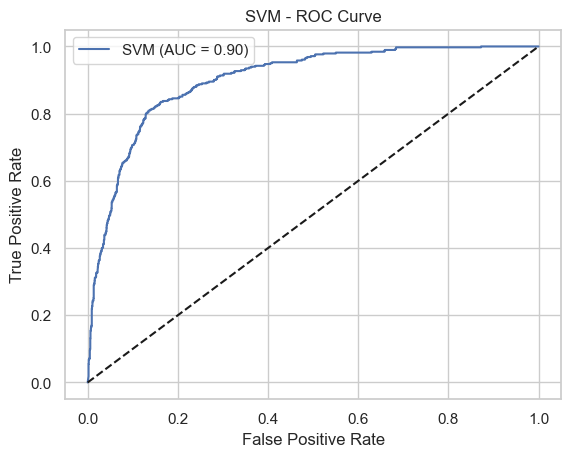

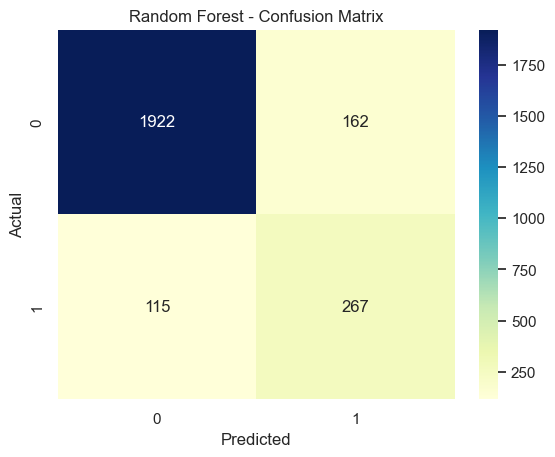

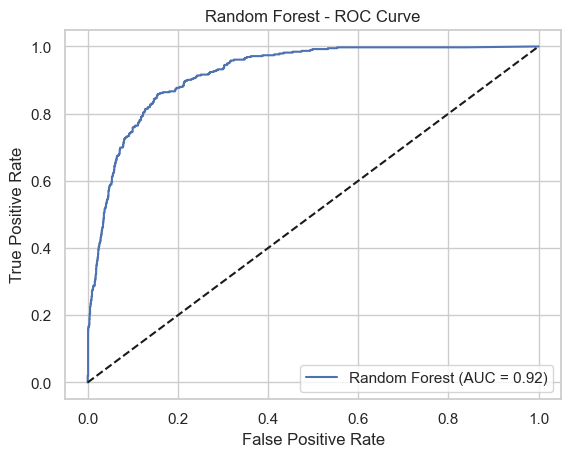

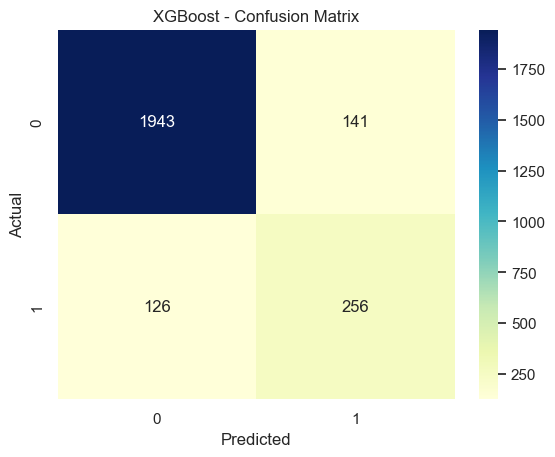

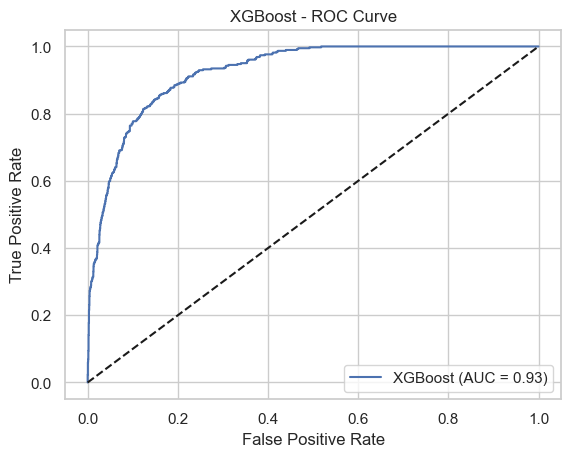

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step


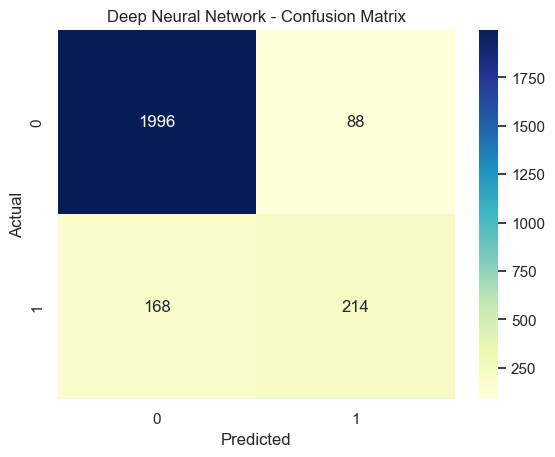

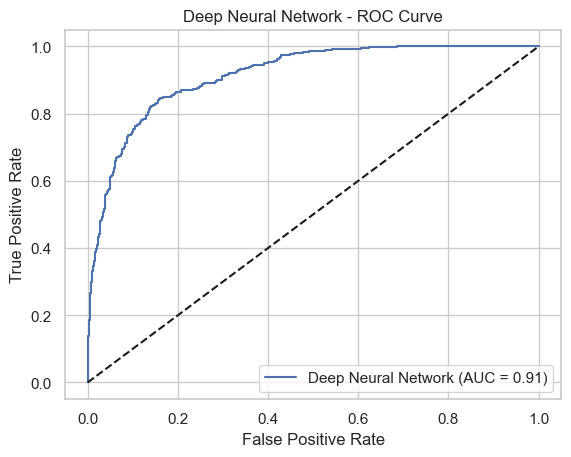

In [5]:
# Run Evaluations
results = []

results.append(evaluate_model("Logistic Regression", logreg_model, X_test, y_test))
results.append(evaluate_model("SVM", svm_model, X_test, y_test))
results.append(evaluate_model("Random Forest", rf_model, X_test, y_test))
results.append(evaluate_model("XGBoost", xgb_model, X_test, y_test))
results.append(evaluate_model("Deep Neural Network", dnn_model, X_test, y_test, is_keras=True))

,Model,F1,Precision,Recall,AUC
2,Random Forest,0.658446,0.622378,0.698953,0.921142
3,XGBoost,0.657253,0.644836,0.670157,0.925686
1,SVM,0.626007,0.558522,0.712042,0.901429
4,Deep Neural Network,0.625731,0.708609,0.560209,0.914816
0,Logistic Regression,0.611765,0.517179,0.748691,0.895957


/var/folders/_q/xgw0xc0502bftj3zqjl2zgb80000gn/T/ipykernel_66052/1030536764.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


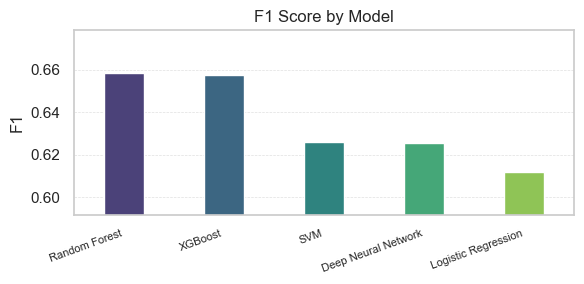

/var/folders/_q/xgw0xc0502bftj3zqjl2zgb80000gn/T/ipykernel_66052/1030536764.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


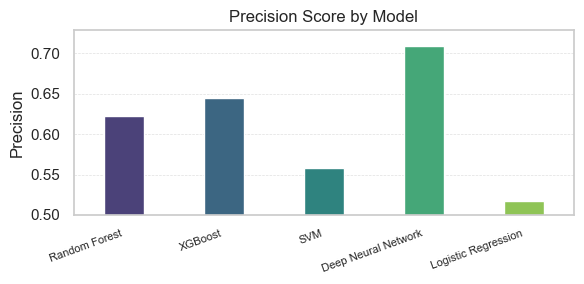

/var/folders/_q/xgw0xc0502bftj3zqjl2zgb80000gn/T/ipykernel_66052/1030536764.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


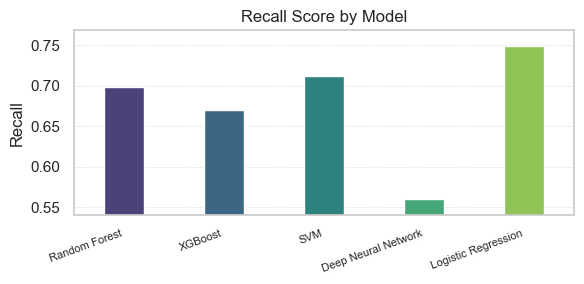

/var/folders/_q/xgw0xc0502bftj3zqjl2zgb80000gn/T/ipykernel_66052/1030536764.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


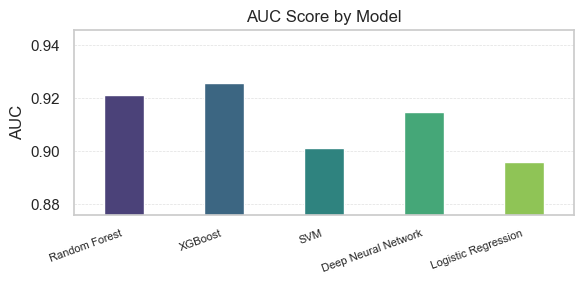

In [6]:
# Summary Table and Bar Plot
# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display comparison
results_df = results_df.sort_values(by="F1", ascending=False)
display(results_df)

# Metrics to compare
metrics_to_plot = ["F1", "Precision", "Recall", "AUC"]

for metric in metrics_to_plot:
    plt.figure(figsize=(6, 3))  
    ax = sns.barplot(
        x="Model",
        y=metric,
        data=results_df,
        width=0.4,        
        palette="viridis" 
    )
    
    # Adjust y-axis to zoom into high-performance range
    ymin = max(0.5, results_df[metric].min() - 0.02)
    ymax = min(1.0, results_df[metric].max() + 0.02)
    plt.ylim(ymin, ymax)

    plt.title(f"{metric} Score by Model", fontsize=12)
    plt.ylabel(metric)
    plt.xlabel("")
    plt.xticks(rotation=20, ha="right", fontsize=8)
    plt.tight_layout()
    plt.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.6)
    plt.show()

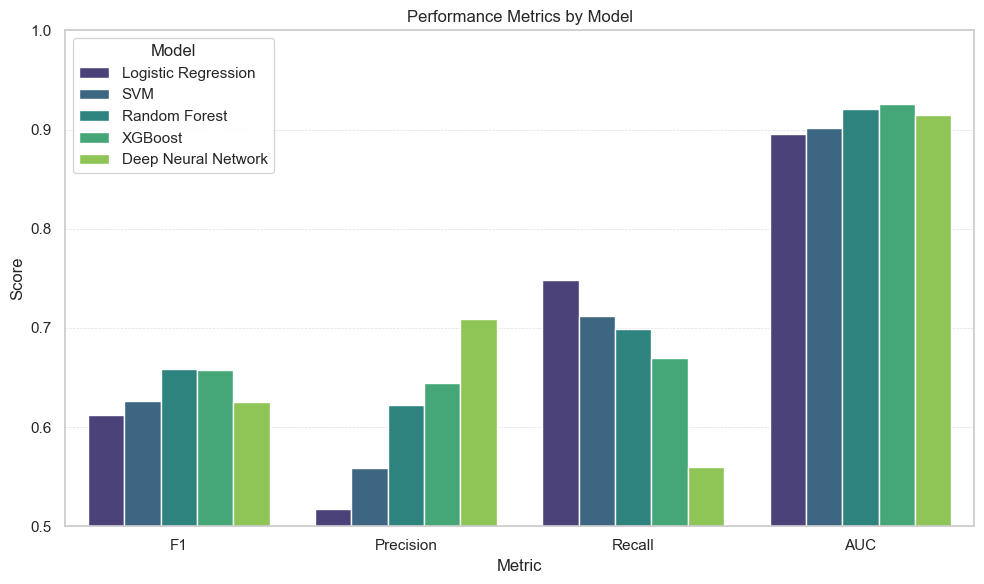

In [7]:
# Re-import necessary libraries after environment reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to DataFrame and sort
results_df = pd.DataFrame(results)

model_order = ["Logistic Regression", "SVM", "Random Forest", "XGBoost", "Deep Neural Network"]

results_df["Model"] = pd.Categorical(results_df["Model"], categories=model_order, ordered=True)

melted_df = pd.melt(results_df, id_vars="Model", value_vars=["F1", "Precision", "Recall", "AUC"],
                    var_name="Metric", value_name="Score")

# Set up the plot
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_df, x="Metric", y="Score", hue="Model", palette="viridis")

plt.title("Performance Metrics by Model")
plt.ylim(0.5, 1.0)
plt.ylabel("Score")
plt.xlabel("Metric")
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.legend(title="Model")
plt.show()


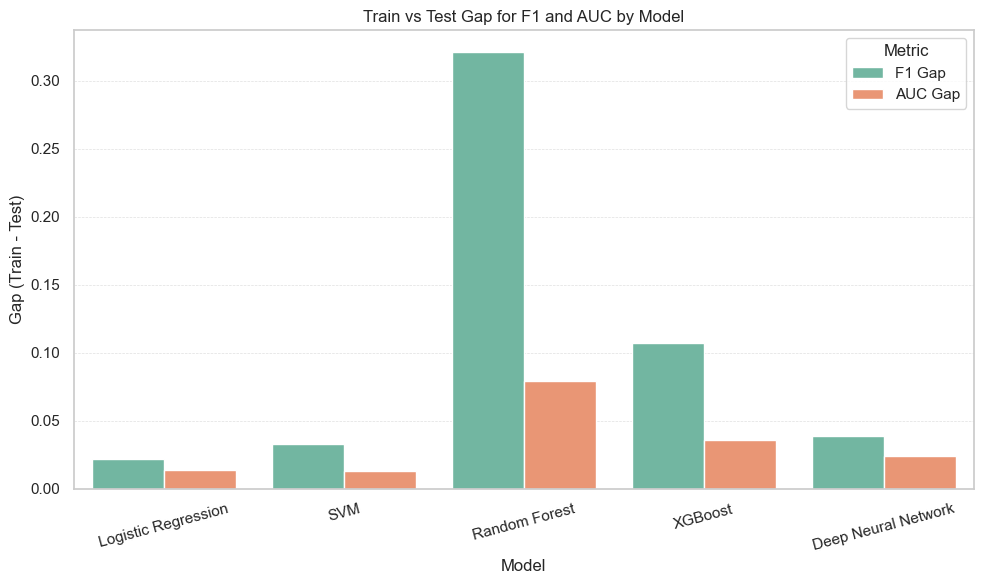

In [8]:
# Re-import libraries after reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated or example data: train and test F1/AUC for each model
data = {
    "Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost", "Deep Neural Network"],
    "Train F1": [0.634, 0.659, 0.979, 0.764, 0.667],
    "Test F1": [0.612, 0.626, 0.658, 0.657, 0.628],
    "Train AUC": [0.91, 0.914, 1.0, 0.962, 0.939],
    "Test AUC": [0.896, 0.901, 0.921, 0.926, 0.915]
}

# Create DataFrame and compute generalization gap
df = pd.DataFrame(data)
df["F1 Gap"] = df["Train F1"] - df["Test F1"]
df["AUC Gap"] = df["Train AUC"] - df["Test AUC"]

# Melt for plotting
melted_gap = pd.melt(df, id_vars="Model", value_vars=["F1 Gap", "AUC Gap"],
                     var_name="Metric", value_name="Gap")

# Plotting the gap
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_gap, x="Model", y="Gap", hue="Metric", palette="Set2")

plt.title("Train vs Test Gap for F1 and AUC by Model")
plt.ylabel("Gap (Train - Test)")
plt.xticks(rotation=15)
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.legend(title="Metric")
plt.show()